## Homework 2

* Sklearn veri kümelerinden Şeker Hastalığı (Diabetes) Veri Kümesini içe aktarın.
* Ham veriyi inceleyin ve analiz edin.
* Regresyon uygulaması için ön işleme yapın.
* Veri kümenizi eğitim ve test alt kümlerine ayırın (eğitim için 0.7 ve test için 0.3 oran olacak şekilde).
* Ridge ve Lasso Regression modellerini, her biri için en az 5 farklı alfa değeri olacak şekilde deneyin.
* Tüm modellerin sonuçlarını değerlendirin ve en iyi performans gösteren modeli seçin.

In [47]:
# Şeker Hastalığı Veri Kümesini içe aktarın
from sklearn.datasets import load_diabetes
import pandas as pd
#load data
Xb,yb =load_diabetes(return_X_y=True)
#convert to dataframe
data= pd.DataFrame(Xb,columns = load_diabetes().feature_names)
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [8]:
# Yinelenen değerleri ve eksik verileri kontrol edin
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [9]:
# Check missing data
data.isna().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [10]:
#Check duplicate values
data.duplicated().sum()

0

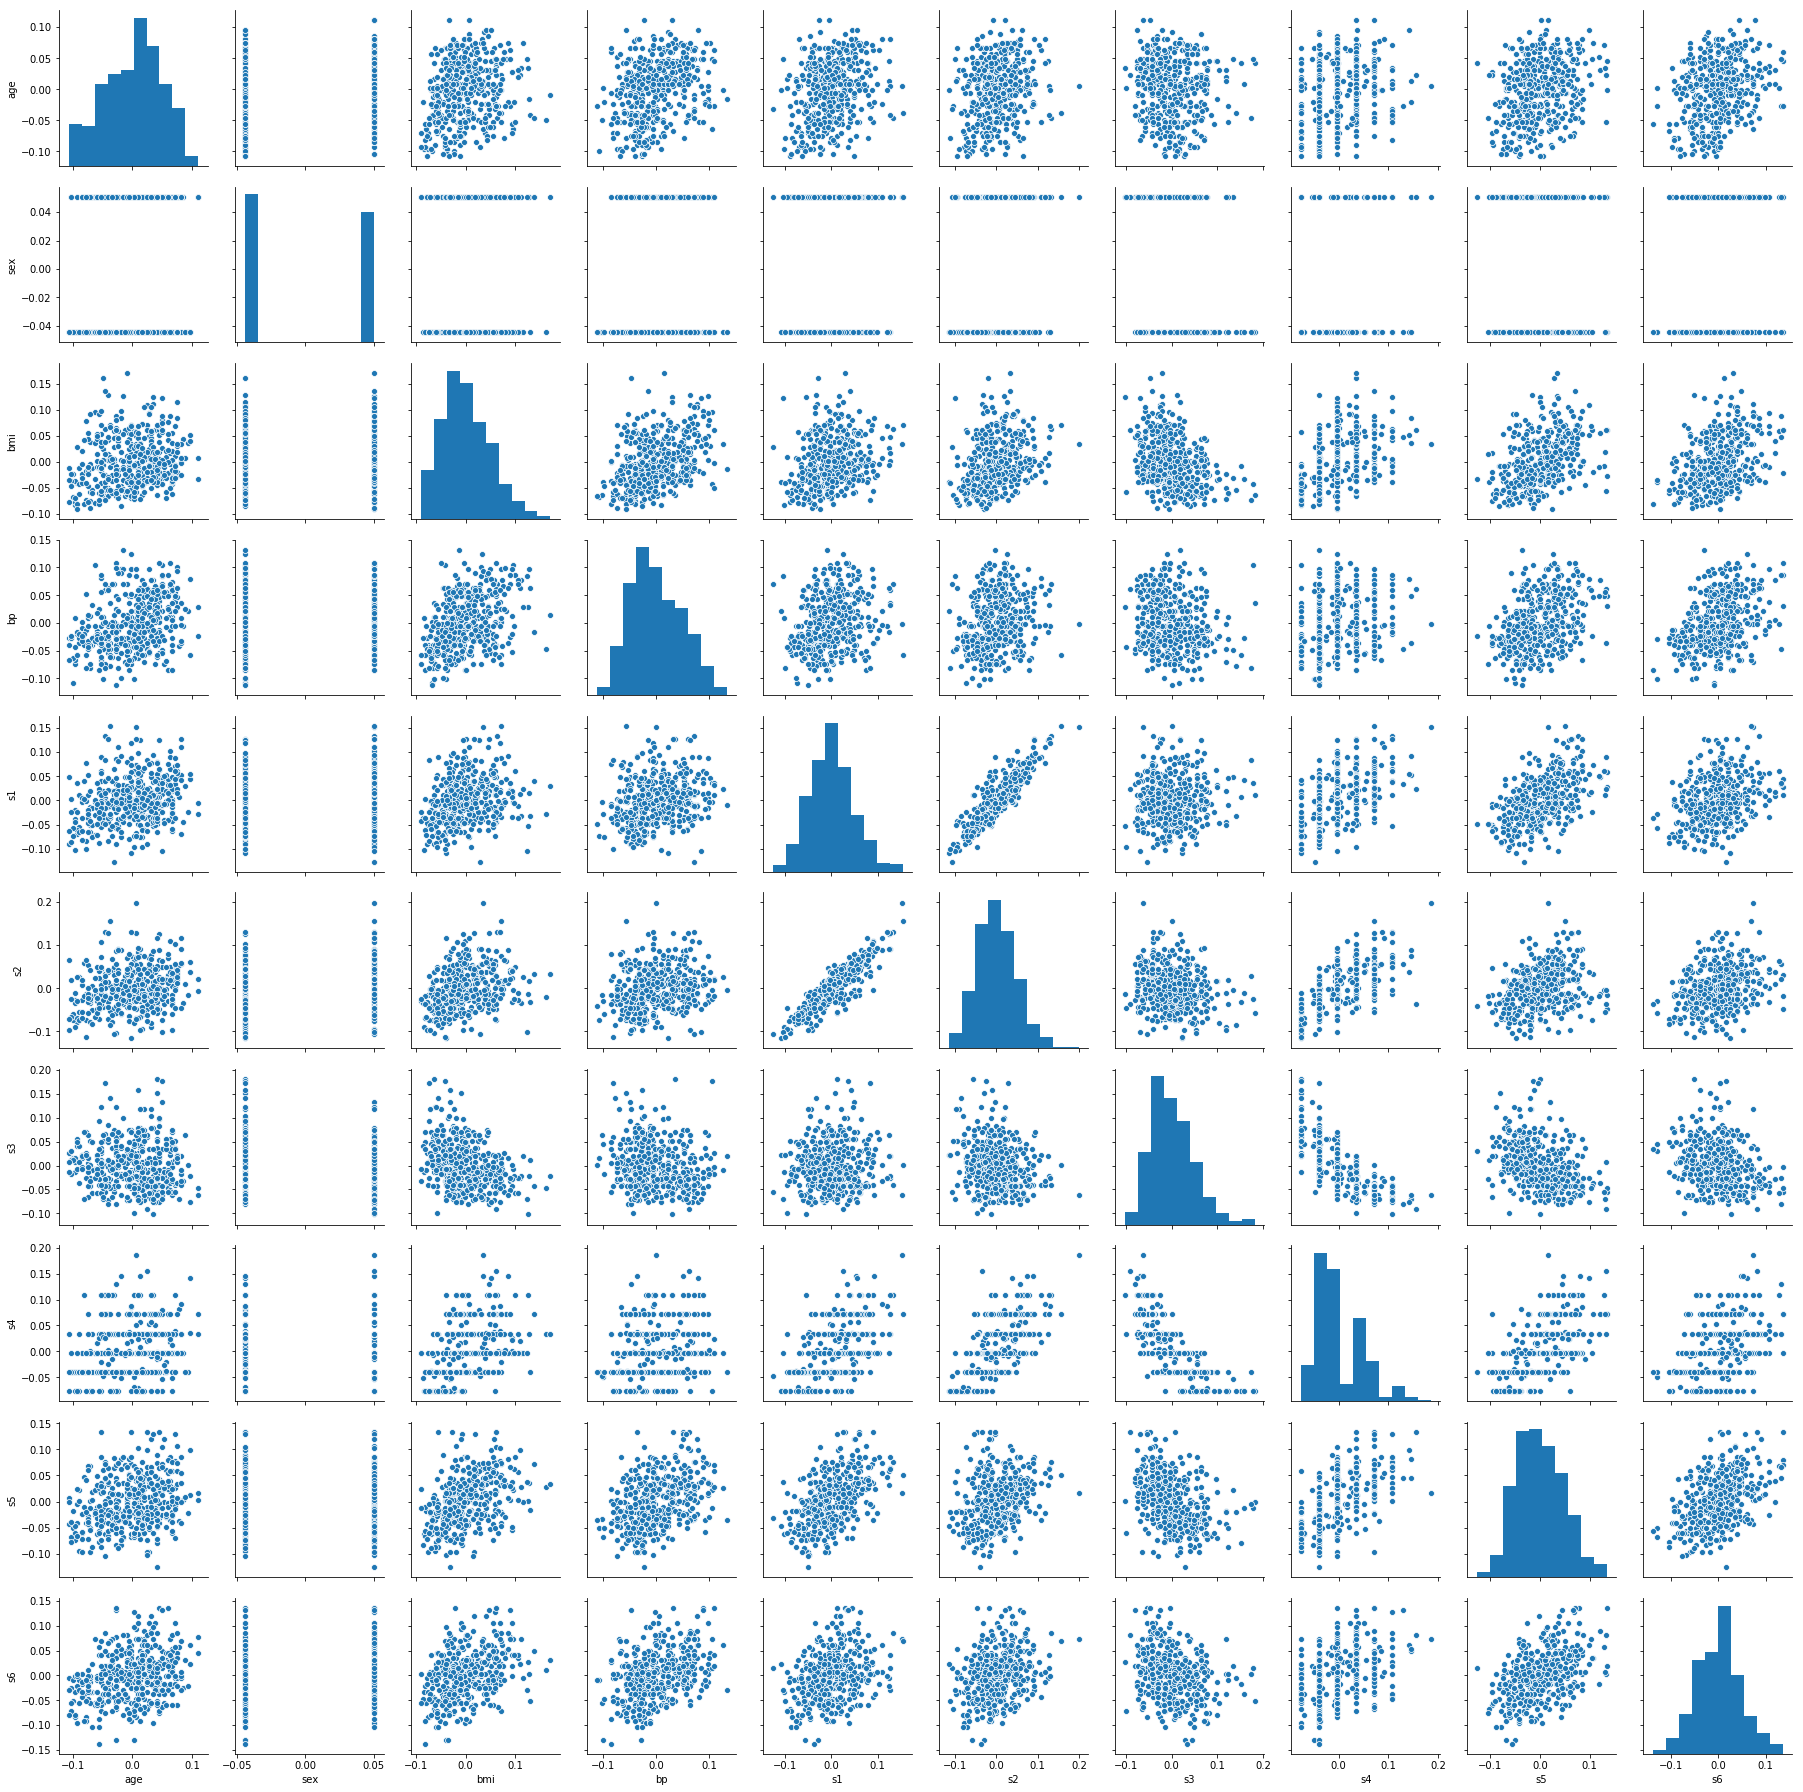

In [11]:
# Her özellik için verileri görselleştirin (pairplot, distplot)
import seaborn as sns
sns.pairplot(data)

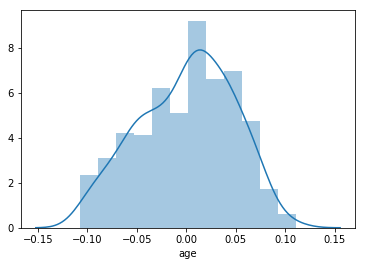

In [12]:
sns.distplot(data['age'])

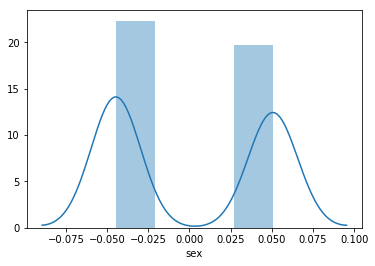

In [13]:
sns.distplot(data['sex'])

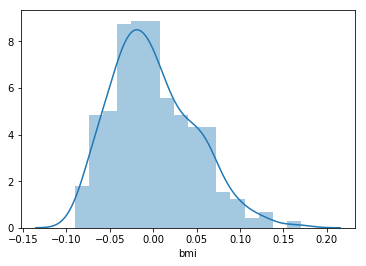

In [14]:
sns.distplot(data['bmi'])

In [15]:
# Korelasyon matrisini bastırın ve yorumlayın
# Draw correlation matrix
data.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


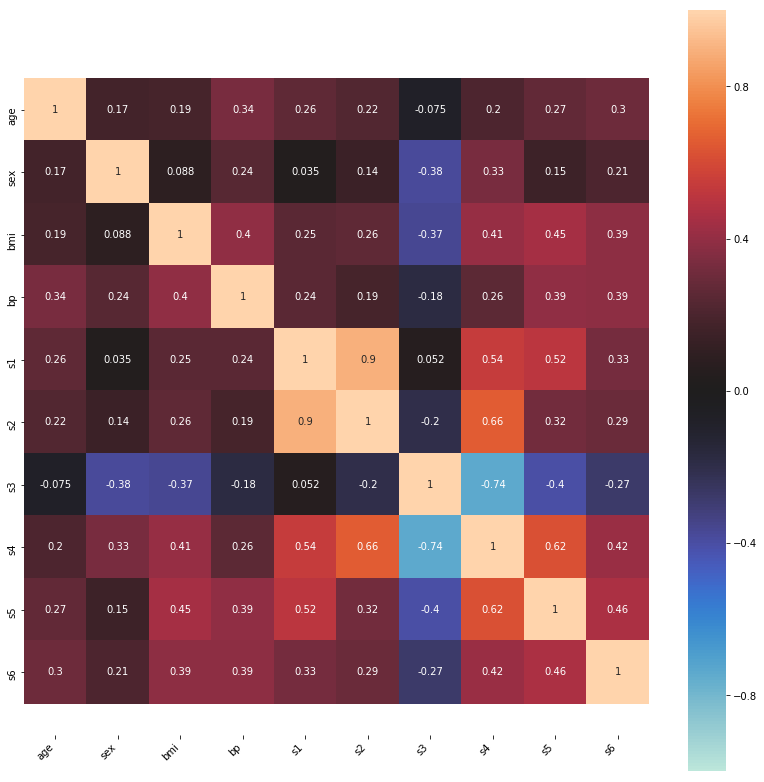

In [39]:
# Correlation of the features
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,
                 square=True, annot = True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
ax.set_ylim(len(corr)+0.5, -0.5);

In [48]:
# İlişkili bulduğunuz özellikleri eleyin (korelasyon matrisini kontrol ederek)
data = data.drop([ "s3"],axis=1)

In [49]:
# Aykırı değerleri işleyin (IsolationForest kullanabilirsiniz)
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
z

array([[0.80050009, 1.06548848, 1.29708846, ..., 0.05449919, 0.41855058,
        0.37098854],
       [0.03956713, 0.93853666, 1.08218016, ..., 0.83030083, 1.43655059,
        1.93847913],
       [1.79330681, 1.06548848, 0.93453324, ..., 0.05449919, 0.06020733,
        0.54515416],
       ...,
       [0.87686984, 1.06548848, 0.33441002, ..., 0.23293356, 0.98558469,
        0.32567395],
       [0.9560041 , 0.93853666, 0.82123474, ..., 0.55838411, 0.93615545,
        0.54515416],
       [0.9560041 , 0.93853666, 1.53537419, ..., 0.83030083, 0.08871747,
        0.06442552]])

In [50]:
len(np.where(z > 3)[0])

10

In [51]:
outliers = list(set(np.where(z > 3)[0]))
data= data.drop(outliers,axis = 0).reset_index(drop = False)

In [52]:
display(data)

,index,age,sex,bmi,bp,s1,s2,s4,s5,s6
0,0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.002592,0.019908,-0.017646
1,1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,-0.039493,-0.068330,-0.092204
2,2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.002592,0.002864,-0.025930
3,3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,0.034309,0.022692,-0.009362
4,4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
430,437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.002592,0.031193,0.007207
431,438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,0.034309,-0.018118,0.044485
432,439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.011080,-0.046879,0.015491
433,440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,0.026560,0.044528,-0.025930


In [53]:
y_new = yb[list(data["index"])]
len(y_new)

435

In [54]:
y_new

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180., 121., 161.,  99., 109., 115., 268., 274., 158., 107.,
        83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,  60.,
       174., 259., 178., 128.,  96., 126., 288.,  8

In [55]:
data = data.drop([ "index"],axis=1)

In [57]:
X_new = data

In [58]:
# Özellikleri ölçekleyin. (scaling)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaled = StandardScaler().fit_transform(X_new)
X_scaled

array([[ 0.79257224,  1.07399504,  1.36851767, ..., -0.0181105 ,
         0.44078924, -0.35452088],
       [-0.04295501, -0.931103  , -1.08504822, ..., -0.83364533,
        -1.42921312, -1.92815948],
       [ 1.78001354,  1.07399504,  0.99464097, ..., -0.0181105 ,
         0.07956758, -0.52936961],
       ...,
       [ 0.86852927,  1.07399504, -0.31392751, ..., -0.20568351,
        -0.97462481,  0.34487405],
       [-0.95443928, -0.931103  ,  0.87780449, ...,  0.62616202,
         0.9625518 , -0.52936961],
       [-0.95443928, -0.931103  , -1.55239411, ..., -0.83364533,
        -0.07055346,  0.08260095]])

In [59]:
# Veri kümesini eğitim ve test verisetlerine ayırın.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_new, test_size=0.3, random_state=42)

In [61]:
# Lasso ve Rdige modellerini Sklearn'dan içe aktarın.
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score

In [62]:
# Lasso için 5 farklı alfa değeri tanımlayın ve modelleri eğitin. R^2 değerlerini 
# hem eğitim hem de test verisetleri için yazdırın.

l1 = Lasso(alpha = 0.1)
l1.fit(X_train, y_train)
l2 = Lasso(alpha = 0)
l2.fit(X_train, y_train)
l3 = Lasso(alpha = 1)
l3.fit(X_train, y_train)
l4 = Lasso(alpha = 10)
l4.fit(X_train, y_train)
l5 = Lasso(alpha = 100)
l5.fit(X_train, y_train)
print("Simple Train Lasso 1: ", l1.score(X_train, y_train))
print("Simple Test Lasso 1: ", l1.score(X_test, y_test))
print("Simple Train Lasso 2: ", l2.score(X_train, y_train))
print("Simple Test Lasso 2: ", l2.score(X_test, y_test))
print("Simple Train Lasso 3: ", l3.score(X_train, y_train))
print("Simple Test Lasso 3: ", l3.score(X_test, y_test))
print("Simple Train Lasso 4: ", l4.score(X_train, y_train))
print("Simple Test Lasso 4: ", l4.score(X_test, y_test))
print("Simple Train Lasso 5: ", l5.score(X_train, y_train))
print("Simple Test Lasso 5: ", l5.score(X_test, y_test))

Simple Train Lasso 1:  0.542554847877252
Simple Test Lasso 1:  0.3890986702115996
Simple Train Lasso 2:  0.5426679048792462
Simple Test Lasso 2:  0.38673831744476705
Simple Train Lasso 3:  0.534827887251536
Simple Test Lasso 3:  0.4014350845595732
Simple Train Lasso 4:  0.46565338829262304
Simple Test Lasso 4:  0.35935488257705595
Simple Train Lasso 5:  0.0
Simple Test Lasso 5:  -0.05414765827364065


/home/ebru/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/home/ebru/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/ebru/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 402534.87338605436, tolerance: 176.03613552631583
  positive)


In [63]:
# Ridge için 5 farklı alfa değeri tanımlayın ve modelleri eğitin. R^2 değerlerini 
# hem eğitim hem de test verisetleri için yazdırın.

r1 = Ridge(alpha = 0.1)
r1.fit(X_train, y_train)
r2 = Ridge(alpha = 0)
r2.fit(X_train, y_train)
r3 = Ridge(alpha = 1)
r3.fit(X_train, y_train)
r4 = Ridge(alpha = 10)
r4.fit(X_train, y_train)
r5 = Ridge(alpha = 100)
r5.fit(X_train, y_train)

print("Simple Train Ridge 1: ", r1.score(X_train, y_train))
print("Simple Test Ridge 1: ", r1.score(X_test, y_test))
print("Simple Train Ridge 2: ", r2.score(X_train, y_train))
print("Simple Test Ridge 2: ", r2.score(X_test, y_test))
print("Simple Train Ridge 3: ", r3.score(X_train, y_train))
print("Simple Test Ridge 3: ", r3.score(X_test, y_test))
print("Simple Train Ridge 4: ", r4.score(X_train, y_train))
print("Simple Test Ridge 4: ", r4.score(X_test, y_test))
print("Simple Train Ridge 5: ", r5.score(X_train, y_train))
print("Simple Test Ridge 5: ", r5.score(X_test, y_test))

Simple Train Ridge 1:  0.5426664190611721
Simple Test Ridge 1:  0.38703290949827784
Simple Train Ridge 2:  0.5426679048792462
Simple Test Ridge 2:  0.38673831744476694
Simple Train Ridge 3:  0.5425449757435628
Simple Test Ridge 3:  0.38934740587182337
Simple Train Ridge 4:  0.5391046959305223
Simple Test Ridge 4:  0.3994015061824484
Simple Train Ridge 5:  0.5136336367121696
Simple Test Ridge 5:  0.4068851193085885


In [65]:
# Sonuçlar hakkında yorum yapın. En iyi modelin katsayısını yazdırın.
print(f'Ridge model coef: {r5.coef_}')

print(f'Lasso model coef: {l3.coef_}')

Ridge model coef: [-0.80764222 -7.13925713 21.82226513 13.91214022 -5.75947037 -2.45244019
 10.31063291 17.67072035  3.56884626]
Lasso model coef: [ -0.60381902 -10.10048012  26.41635628  15.95503786 -13.22209551
   0.          10.52150712  24.91438222   0.        ]


Regularization, modelin daha iyi genelleştirilmesi için öğrenme algoritmasında küçük değişiklikler yapan bir tekniktir. Bu da modelin görünmeyen veriler üzerindeki performansını iyileştirir. 
-Ridge, kare katsayılarının doğrusal bir fonksiyonu olan bir kısıt ekler. Düzenlenmiş kayıp fonksiyonunu en aza indirmek için, λ'yı seçmemiz gerekir. 
-Lasso modeli mutlak ağırlık katsayıları ile cezalandırır.Genel olarak Lasso, özellik seçiminde çok yardımcı olması açısından ridge regresyonundan daha iyi performans gösterir.

Burada Lasso3 (alpha = 1) modeli 0.40 ve Ridge 5 (alpha = 100) 0.40 test score vermiştir.